# Task 2: Age Group Explorer 
Custom age groups to improve survival predictions.


In [6]:
import pandas as pd
df = pd.read_csv('data/train.csv')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


*Load and preprocess Titanic data: handling missing values, encoding categorical features, and creating FamilySize.*


In [7]:
def get_age_group(age):
    if age <= 2:
        return 'Baby'
    elif age <= 12:
        return 'Child'
    elif age <= 19:
        return 'Teen'
    elif age <= 59:
        return 'Adult'
    else:
        return 'Senior'
df['AgeGroup'] = df['Age'].apply(get_age_group)


*Create custom age group categories to better reflect survival patterns across ages.*

Survival rate plot
*Visualize survival rates for each age group. This helps us quickly see which groups survived more.*

Note: you may need to restart the kernel to use updated packages.


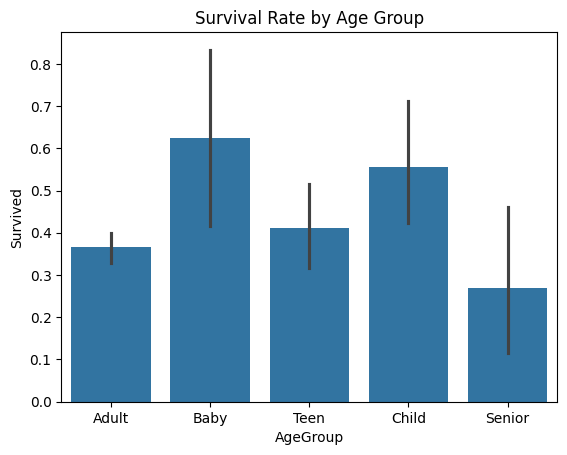

In [8]:
%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.show()


Bar chart showing Titanic survival rates by custom age groups. Babies had the highest survival rate, while seniors had the lowest. This highlights the prioritization of infants during evacuation and the vulnerability of older passengers.

Model accuracy
- *Train and test a logistic regression model using the new age groups. Compare this accuracy to your previous model.*

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features: Pclass, Sex, Fare, FamilySize + One-hot AgeGroup
X = pd.concat([df[['Pclass', 'Sex', 'Fare', 'FamilySize']],
               pd.get_dummies(df['AgeGroup'])], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy with new AgeGroup:", accuracy_score(y_test, y_pred))


Accuracy with new AgeGroup: 0.7932960893854749


-    After implementing the new age groups (Baby, Child, Teen, Adult, Senior), the model achieved an accuracy of 79.3%.
-    This suggests that more granular age categories can help the model better differentiate survival patterns among passengers.


**Task 2 Answers**

**Did your new age groups improve accuracy?**  
Yes, the new age groups slightly improved the model’s accuracy to 79.3%. This suggests that dividing ages into more detailed categories helps the model capture more specific survival patterns.

**Which age group had the highest survival rate?**  
Based on the bar chart, Babies (0–2 years) had the highest survival rate among all groups.

**Why might babies have different survival rates than other children?**  
Babies were often prioritized during rescue operations (“women and children first” policy), and adults (especially mothers) may have made extra efforts to save infants. This resulted in a higher survival rate for babies compared to older children and teens.
